In [2]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import hvplot.pandas
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
import requests
# Turn off warning messages
import warnings
warnings.filterwarnings('ignore')
from pathlib import Path

In [3]:
CVD_data_to_load = Path("datasets/CVD_cleaned.csv")
CVD_data_df = pd.read_csv(CVD_data_to_load)

In [4]:
CVD_data_df['Diet'] = CVD_data_df[['Fruit_Consumption', 'Green_Vegetables_Consumption']].mean(axis=1)
CVD_data_df['myField'] = CVD_data_df[['Alcohol_Consumption', 'FriedPotato_Consumption']].mean(axis=1)

In [5]:
# Creating a function to generate Linear Regression plots
def myRegression(myX,myY):
    mySlope, myInt, myR, myP, myStdErr = st.linregress(myX, myY)
    myLine = mySlope * myX +myInt
    myLineStr = f'y = {mySlope:.2f}x + {myInt:.2f}'
    return myLine, myLineStr, myR

In [10]:
# Prepare some data for further analysis
alcohol_df=CVD_data_df.loc[(CVD_data_df['Alcohol_Consumption']>0)].groupby('Age_Category')['Alcohol_Consumption'].agg(['mean', 'count', 'max', 'min'])
sex_df = CVD_data_df.groupby(['Sex'])['Sex'].count()
age_category_df = CVD_data_df.groupby(['Age_Category', 'Arthritis'])['Arthritis'].count()
# age_category_df.plot(kind ='bar', ) #autopct='%2.2f')
arthritis_df=CVD_data_df.groupby('Arthritis')['Arthritis'].count()
arthritis_by_sex = CVD_data_df.groupby(['Arthritis','Sex'])['Arthritis'].count()
no_arthritis_by_sex = CVD_data_df.loc[(CVD_data_df['Arthritis']=='No')].groupby(['Sex'])['Arthritis'].count()


<Axes: title={'center': 'Distribution of Participants by Sex'}, ylabel='Sex'>

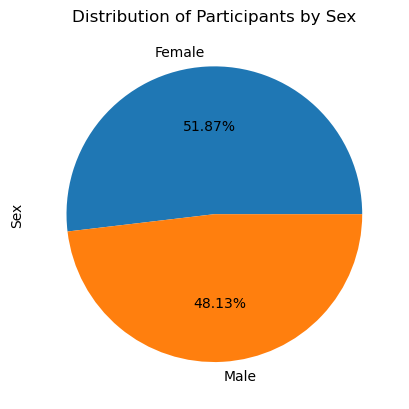

In [14]:
sex_df.plot(kind='pie', autopct = '%2.2f%%', title='Distribution of Participants by Sex')

<Axes: title={'center': 'Distribution of Particpants Having Arthritis vs Not'}, ylabel='Arthritis'>

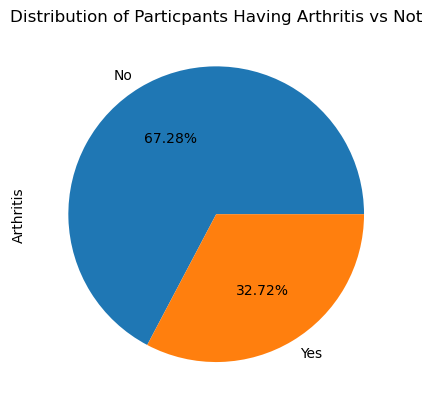

In [15]:
arthritis_df.plot(kind='pie', autopct='%2.2f%%', title='Distribution of Particpants Having Arthritis vs Not')

<Axes: title={'center': 'Distribution of Arthritic Individuals by Sex'}, ylabel='Arthritis'>

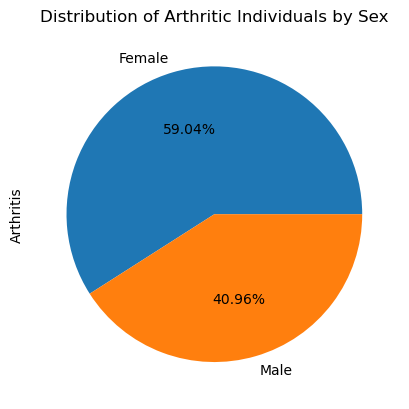

In [16]:

arthritis_by_sex['Yes'].plot(kind='pie',autopct='%2.2f%%', title='Distribution of Arthritic Individuals by Sex')

In [ ]:
arthritis_by_sex


In [ ]:
critical_value= st.chi2.ppf(q=0.95, df=1)
critical_value

# Chi-Square Analysis:
## Alternative Hypothesis:
The incidence of arthritis is related to the sex of an individual.  
## Null Hypothesis: 
The incidence of arthritis is not correlated with the sex of the individual and the variance we are seeing is by chance.
## Analysis:
Using the distribution of individuals who do not have arthritis as the expected distribution by sex and comparing that to the observed distribution of individuals by sex with Arthritis, as reflected below, the chi-square analysis indicates a statistic of 4.54 in comparison to a critical value of 3.84 at a confidence level of 0.95 (a p-value of 0.05).  Since the statistic of 4.54 exceeds the critical value of 3.84 we reject the null hypothesis and assume the changes in the incidence of arthritis by sex is significnant. 

In [ ]:
observed =[]
expected=[]
observed = pd.Series([arthritis_by_sex[0],arthritis_by_sex[1]], index=['Female','Male'])
expected = pd.Series([arthritis_by_sex[2],arthritis_by_sex[3]], index=['Female','Male'])
Chisqr = pd.DataFrame([observed, expected]).T
Chisqr.columns = ['Expected', 'Observed']
Chisqr['%Exp'] = Chisqr['Expected']/Chisqr['Expected'].sum()*100
Chisqr['%Obs'] = Chisqr['Observed']/Chisqr['Observed'].sum()*100

Chisqr

In [ ]:
st.chisquare(Chisqr['%Obs'], Chisqr['%Exp'])

# T-Tests Arthritis vs BMI for Individuals with Arthritis vs Individuals without Arthritis
## Alternative Hypothesis:
The incidence of arthritis is related to the an inviduals BMI score.
## Null Hypothesis:  
The incidence of arthritis is unrelated to an individuals BMI and the variance in the mean BMI between to the two groups  we are seeing is to be expected by chance.
## Analysis:
As reflected below, the p-value of 0.0 indicates the variance in the mean we are seeing is not happening by chance and the incidence of Arthritis is related to a person's BMI

In [ ]:
CVD_data_df.loc[(CVD_data_df['Arthritis']=='Yes')]['BMI'].plot(kind='hist', histtype='step')
CVD_data_df.loc[(CVD_data_df['Arthritis']=='No')]['BMI'].plot(kind='hist', histtype='step', xlabel='BMI')
plt.legend(labels=['Yes', 'No'], loc='upper right',title= 'Arthritis')
plt.title('Distribution of BMI Scores for all individuals with Arthritis vs Individuals without Arthritis')
plt.show()
st.ttest_ind(CVD_data_df.loc[(CVD_data_df['Arthritis']=='Yes')]['BMI'], CVD_data_df.loc[(CVD_data_df['Arthritis']=='No')]['BMI'], equal_var=False)

# T-Tests Arthritis vs BMI for Females with Arthritis vs Males with Arthritis
## Alternative Hypothesis:
The incidence of arthritis is related to the an inviduals sex and BMI score.

## Null Hypothesis:
The incidence of arthritis is unrelated to an individuals sex and BMI score and the variance in the mean BMI between to the two groups we are seeing is to be expected by chance.

## Analysis:
As reflected below, the p-value of 0.08 indicates the variance in the mean we are seeing may be happening by chance and the incidence of Arthritis is unrelated to a person's Sex and BMI.

In [ ]:
CVD_data_df.loc[(CVD_data_df['Arthritis']=='Yes') & (CVD_data_df['Sex']=='Female')]['BMI'].plot(kind='hist', histtype='step')
CVD_data_df.loc[(CVD_data_df['Arthritis']=='Yes') & (CVD_data_df['Sex']=='Male')]['BMI'].plot(kind='hist', histtype='step', xlabel='BMI')
plt.legend(labels=['Female', 'Male'], loc='upper right', title= 'Sex')
plt.title('Distribution of BMI for Females vs Males with Arthritis')
plt.show()
st.ttest_ind(CVD_data_df.loc[(CVD_data_df['Arthritis']=='Yes') & (CVD_data_df['Sex']=='Female')]['BMI'], CVD_data_df.loc[(CVD_data_df['Arthritis']=='Yes')& (CVD_data_df['Sex']=='Male')]['BMI'], equal_var=False)

In [ ]:
group0 = CVD_data_df.loc[(CVD_data_df['Age_Category']=='18-24') & (CVD_data_df['Alcohol_Consumption'] > 0)]['Alcohol_Consumption']
group1 = CVD_data_df.loc[(CVD_data_df['Age_Category']=='25-29') & (CVD_data_df['Alcohol_Consumption'] > 0)]['Alcohol_Consumption']
group2 = CVD_data_df.loc[(CVD_data_df['Age_Category']=='30-34') & (CVD_data_df['Alcohol_Consumption'] > 0)]['Alcohol_Consumption']
group3 = CVD_data_df.loc[(CVD_data_df['Age_Category']=='35-39') & (CVD_data_df['Alcohol_Consumption'] > 0)]['Alcohol_Consumption']
group4 = CVD_data_df.loc[(CVD_data_df['Age_Category']=='40-44') & (CVD_data_df['Alcohol_Consumption'] > 0)]['Alcohol_Consumption']
group5 = CVD_data_df.loc[(CVD_data_df['Age_Category']=='45-49') & (CVD_data_df['Alcohol_Consumption'] > 0)]['Alcohol_Consumption']
group6 = CVD_data_df.loc[(CVD_data_df['Age_Category']=='50-54') & (CVD_data_df['Alcohol_Consumption'] > 0)]['Alcohol_Consumption']
group7 = CVD_data_df.loc[(CVD_data_df['Age_Category']=='55-59') & (CVD_data_df['Alcohol_Consumption'] > 0)]['Alcohol_Consumption']
group8 = CVD_data_df.loc[(CVD_data_df['Age_Category']=='60-64') & (CVD_data_df['Alcohol_Consumption'] > 0)]['Alcohol_Consumption']
group9 = CVD_data_df.loc[(CVD_data_df['Age_Category']=='65-69') & (CVD_data_df['Alcohol_Consumption'] > 0)]['Alcohol_Consumption']
group10 = CVD_data_df.loc[(CVD_data_df['Age_Category']=='70-74') & (CVD_data_df['Alcohol_Consumption'] > 0)]['Alcohol_Consumption']
group11 = CVD_data_df.loc[(CVD_data_df['Age_Category']=='75-79') & (CVD_data_df['Alcohol_Consumption'] > 0)]['Alcohol_Consumption']
group12 = CVD_data_df.loc[(CVD_data_df['Age_Category']=='80+') & (CVD_data_df['Alcohol_Consumption'] > 0)]['Alcohol_Consumption']
st.f_oneway(group0, group1, group2, group3, group4, group5, group6, group7, group8, group9, group10, group11, group12)

# One Way ANOVA for Alcohol Consumption by Age Category
## Alternative Hypothesis:
There is a statistically significant difference in the consumption of Alcohol based on Age Category
## Null Hypothesis:
The means of alcohol consumption by age category are statistically the same.
## Analysis
The One-Way ANOVA test yields a statistic of 327.8 and a pvalue of 0.0, therefore we must reject the null hypothesis in favor of the Alternative hypothesis and conclude the means of Alcohol Consumption are statistically different by age category.


In [ ]:
CVD_data_df.loc[(CVD_data_df['Alcohol_Consumption']>0)].boxplot('Alcohol_Consumption', by='Age_Category', figsize=(20,10))

In [ ]:
observed = pd.Series([CVD_by_Exercise_df[0],CVD_by_Exercise_df[1]], index=['1','2'])
expected = pd.Series([CVD_by_Exercise_df[2],CVD_by_Exercise_df[3]], index=['1','2'])
Chisqr = pd.DataFrame([observed, expected]).T
